# AGN Tutorial 2

___
## Assignment - BPT Diagram

1) Use SDSS DR18 SQL search to find all galaxies which have only the narrow emission lines (FWHM<500 km/s), high median signal to noise ratio in g band (S/N>40), and fluxes of lines: $\text{[O III] } 5007, Hβ, Hα \text{ and [N II] } 6583$ larger than $5e-17 \text{ erg/s/cm}^2$. Set criteria so that the fluxes are larger than errors in flux multiplied with 5 in order to get good results. SQL output should be the fluxes of these lines.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from astroquery.sdss import SDSS
sdss = SDSS()

In [2]:
query= """select s.specobjid, s.z as redshift, 
s.plate, s.mjd, s.fiberid, s.subclass,
g.oiii_5007_flux, g.h_beta_flux, g.h_alpha_flux, g.nii_6584_flux
FROM SpecObj AS s 
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid
WHERE s.class = 'GALAXY' 
and g.sigma_forbidden*2.355 < 500
and s.snmedian_g > 40
and g.oiii_5007_flux > 5e-17
and g.h_beta_flux > 5e-17
and g.h_alpha_flux > 5e-17
and g.nii_6584_flux >5e-17
and g.oiii_5007_flux > 5*g.oiii_5007_flux_err
and g.h_beta_flux > 5*g.h_beta_flux_err
and g.h_alpha_flux > 5*g.h_alpha_flux_err
and g.nii_6584_flux > 5*g.nii_6584_flux_err"""

results = sdss.query_sql(query)
results

/home/meghana/miniconda3/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


specobjid,redshift,plate,mjd,fiberid,subclass,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux
int64,float64,int64,int64,int64,bytes21,float64,float64,float64,float64
2908302882170234880,0.02824144,2583,54095,376,AGN,98.02604,91.74318,436.732,474.3304
749902975203305472,0.0158319,666,52149,195,AGN BROADLINE,195.5715,114.9784,391.0006,408.2613
750024746116081664,0.0178122,666,52149,638,BROADLINE,132.0547,63.95876,169.2926,254.7631
2654998487875217408,0.005296941,2358,53797,460,AGN,1585.921,293.4624,1090.344,716.5037
417743534917969920,0.02741746,371,52078,126,STARFORMING BROADLINE,68.33032,145.7529,575.3583,388.0303
672239519621212160,0.0114945,597,52059,281,STARFORMING,60.79649,294.4742,1228.359,431.5605
...,...,...,...,...,...,...,...,...,...
1148446263054723072,0.01787252,1020,52721,103,BROADLINE,155.4445,77.28137,202.3219,242.2809
2385845188137347072,0.03106652,2119,53792,230,BROADLINE,123.8715,145.0453,322.2974,323.6526


2) For the obtained sample make the diagnostic BPT (Baldwin, Philips and Terlevich) diagram. This diagram determines the dominant ionization source for the objects: accretion disk (AGN) or hot emission stars (H II - star-burst region). For the BPT diagram use the flux ratios of the lines: [O III] 5007/Hβ vs. [NII]6583/Hα.

In [3]:
results['log(oiii/hb)'] = np.log(results['oiii_5007_flux']/results['h_beta_flux'])
results['log(nii/ha)'] = np.log(results['nii_6584_flux']/results['h_alpha_flux'])

In [4]:
df = results.to_pandas()
df['subclass'] = df['subclass'].astype(str)

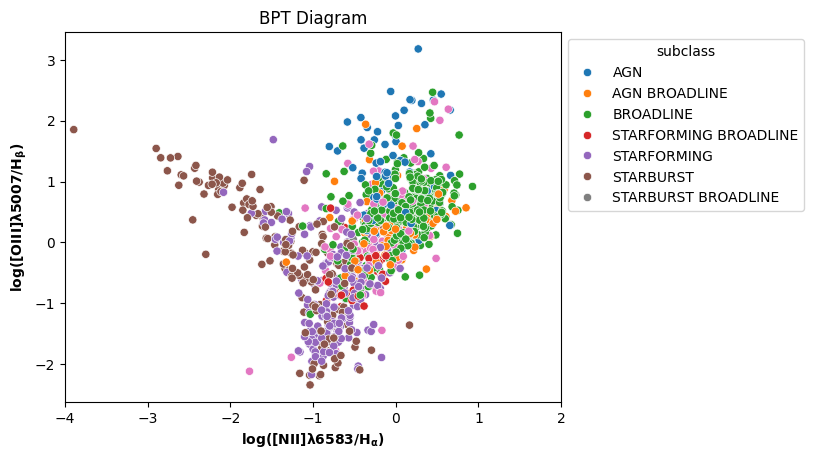

In [5]:
ax = sns.scatterplot(x = 'log(nii/ha)', y='log(oiii/hb)',data=df, hue='subclass')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title(r'BPT Diagram')
plt.xlabel(r'$\bf log([NII] \lambda 6583 /H_{\alpha})$')
plt.ylabel(r'$\bf log([OIII] \lambda 5007 /H_{\beta})$')

plt.xlim(-4,2)

plt.show()

___
## Assignment - WISE color-color diagram

1. For the sample of galaxies selected from SDSS database in Part I, find the corresponding WISE colors using WISE fluxes from Cross-identifications link:
https://skyserver.sdss.org/dr14/en/help/docs/realquery.aspx#wisexmatch

In [6]:
wise_query = """select s.specobjid, s.z as redshift, 
s.plate, s.mjd, s.fiberid, s.subclass,
W.w1mpro as w1, W.w2mpro as w2, W.w3mpro as w3,
g.oiii_5007_flux, g.h_beta_flux, g.h_alpha_flux, g.nii_6584_flux

from wise_xmatch as X
join wise_allsky as W on X.wise_cntr = W.cntr
join SpecObj as s on X.sdss_objid = s.bestobjid
join GalSpecLine AS g on s.specobjid = g.specobjid

where s.class = 'GALAXY'
and g.sigma_forbidden*2.355 < 500
and s.snmedian_g > 40
and g.oiii_5007_flux > 5e-17
and g.h_beta_flux > 5e-17
and g.h_alpha_flux > 5e-17
and g.nii_6584_flux >5e-17
and g.oiii_5007_flux > 5*g.oiii_5007_flux_err
and g.h_beta_flux > 5*g.h_beta_flux_err
and g.h_alpha_flux > 5*g.h_alpha_flux_err
and g.nii_6584_flux > 5*g.nii_6584_flux_err"""

wise = sdss.query_sql(wise_query)
wise

/home/meghana/miniconda3/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


specobjid,redshift,plate,mjd,fiberid,subclass,w1,w2,w3,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux
int64,float64,int64,int64,int64,bytes21,float64,float64,float64,float64,float64,float64,float64
2651652124152195072,0.02568513,2355,53792,574,STARBURST,11.692,11.071,6.562,12757.19,4823.73,20424.81,3189.435
2165170997483825152,0.04128448,1923,53319,238,BROADLINE,11.251,11.284,9.858,68.18163,98.06348,232.3804,134.5777
480904427633403904,0.01209331,427,51900,528,BROADLINE,10.383,10.405,9.154,168.3746,109.4587,395.4808,262.1568
3089627470844946432,0.02633645,2744,54272,575,BROADLINE,11.151,11.209,10.665,90.51768,122.4566,280.607,139.1368
1079879063478233088,0.04268014,959,52411,513,BROADLINE,11.092,10.94,8.402,557.58,72.47333,487.1251,743.6385
2979297254906554368,0.02175551,2646,54479,604,BROADLINE,11.046,11.142,10.223,174.9265,104.437,456.7321,352.7485
...,...,...,...,...,...,...,...,...,...,...,...,...
2581785855748237312,0.03143699,2293,53730,354,AGN,11.432,11.525,10.249,109.7094,73.4275,221.9537,351.4519
2793396770091067392,0.004190064,2481,54086,142,STARBURST,9.794,9.582,5.388,213.7396,1910.431,9145.261,3631.537


In [7]:
wise['log(oiii/hb)'] = np.log(wise['oiii_5007_flux']/wise['h_beta_flux'])
wise['log(nii/ha)'] = np.log(wise['nii_6584_flux']/wise['h_alpha_flux'])

df_wise = wise.to_pandas()
df_wise['subclass'] = df_wise['subclass'].astype(str)

2. Assign classes (AGN & (u)LIRGS, Spheroids, Intermediate disks and SF disks) to all objects in the sample using the thresholds from the image on the bottom right (dashed lines). How do these classes compare to ones obtained using BPT diagram from Part I?

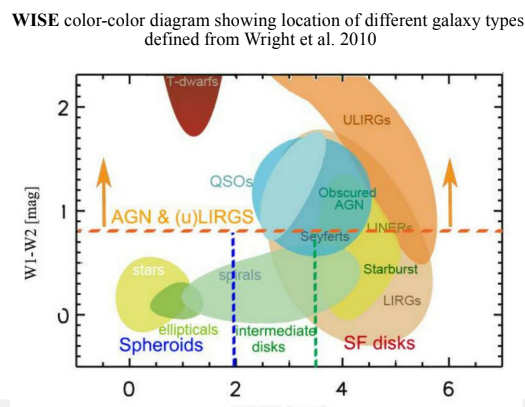

In [8]:
df_wise['w1_w2'] = df_wise.w1 - df_wise.w2
df_wise['w2_w3'] = df_wise.w2 - df_wise.w3
df_wise['wise_class'] = ''

In [9]:
for i in range(len(df_wise)):
    if df_wise['w1_w2'][i] > 0.8:
        df_wise['wise_class'][i] = 'AGN & (u)LIRGS'
    elif df_wise['w2_w3'][i] < 2:
        df_wise['wise_class'][i] = 'Spheroids'
    elif df_wise['w2_w3'][i] > 2 and df_wise['w2_w3'][i] < 3.5:
        df_wise['wise_class'][i] = 'Intermediate Disks'
    elif df_wise['w2_w3'][i] > 3.5:
        df_wise['wise_class'][i] = 'SF Disks'
        
df_wise['wise_class'] = df_wise['wise_class'].astype(str)

/tmp/ipykernel_30714/3129575184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'SF Disks'
/tmp/ipykernel_30714/3129575184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'Spheroids'
/tmp/ipykernel_30714/3129575184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'Spheroids'
/tmp/ipykernel_30714/3129575184.py:5: SettingWithCopyWarning: 
A value 

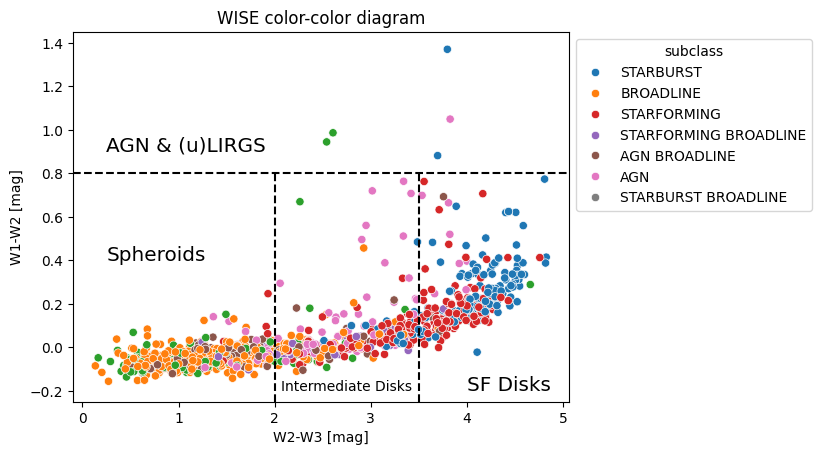

In [10]:
ax = sns.scatterplot(x = 'w2_w3', y='w1_w2',data=df_wise, hue='subclass')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.vlines(2, -0.25, 0.8, linestyle='--', color='black')
ax.vlines(3.5, -0.25, 0.8, linestyle='--', color='black')
plt.axhline(0.8,linestyle='--', color='black')

plt.title(r'WISE color-color diagram')
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

plt.text(0.25,0.9, 'AGN & (u)LIRGS',  fontsize='x-large')
plt.text(0.25,0.4, 'Spheroids',  fontsize='x-large')
plt.text(2.07,-0.2, 'Intermediate Disks')
plt.text(4,-0.2, 'SF Disks', fontsize='x-large')

plt.ylim(-0.25,1.45)

plt.show()

>The spheroids class in this diagram mostly contain the Starforming sources and some AGN broadline sources from the BPT Diagram. The Intermediate disk class contains Starburst galaxies and AGNs. SF disk class mostly contains Starburst galaxies. The AGN & (u)LIRGS class mostly contains AGNs from the BPT Diagram.

3. Locate one random object on the WISE color-color plot having W1-W2>=0.8 (Assef et al. 2013) and address the following:

- Where is the object located in this plot? Mark it clearly on the graph.
- Does it agree with the optical classification from BPT diagram?
- Draw some conclusions about the type of AGN using the WISE color-color plot.

In [11]:
df_wise[df_wise['w1_w2']>=0.8]

,specobjid,redshift,plate,mjd,fiberid,subclass,w1,w2,w3,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,log(oiii/hb),log(nii/ha),w1_w2,w2_w3,wise_class
280,1999772022116214784,0.021559,1776,53858,632,STARBURST,10.197,9.315,5.619,4133.13400,3754.2180,16633.6700,6907.3280,0.096156,-0.878846,0.882,3.696,AGN & (u)LIRGS
335,1335389077041604608,0.173856,1186,52646,261,,10.828,9.841,7.234,104.86920,692.0834,627.0295,177.3339,-1.886993,-1.262959,0.987,2.607,AGN & (u)LIRGS
371,1071924646573533184,0.009990,952,52409,247,STARBURST,7.766,6.395,2.598,3576.73600,3131.9990,14658.1400,6027.3130,0.132779,-0.888695,1.371,3.797,AGN & (u)LIRGS
479,1491991695498176512,0.152479,1325,52762,634,,10.642,9.697,7.156,83.56572,694.1924,609.1766,103.8537,-2.117116,-1.769125,0.945,2.541,AGN & (u)LIRGS
973,2383626653969442816,0.007899,2117,54115,351,AGN,10.131,9.081,5.255,4433.45500,569.2051,2661.4700,1745.9360,2.052694,-0.421588,1.050,3.826,AGN & (u)LIRGS


>For specobjid = '2383626653969442816'

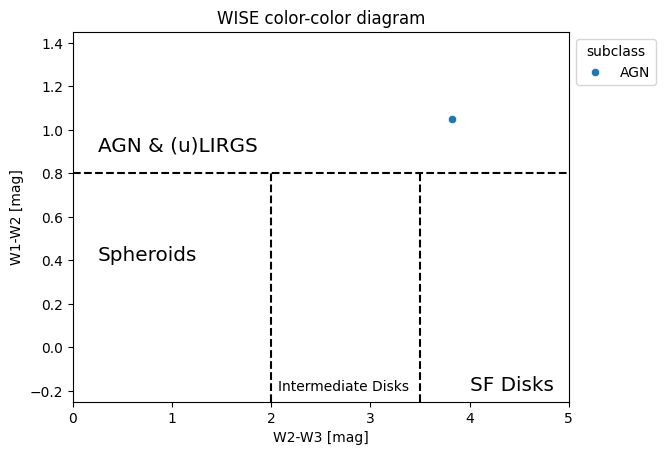

In [12]:
ax = sns.scatterplot(x = 'w2_w3', y='w1_w2',data=df_wise[df_wise.specobjid == 2383626653969442816], hue='subclass')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.vlines(2, -0.25, 0.8, linestyle='--', color='black')
ax.vlines(3.5, -0.25, 0.8, linestyle='--', color='black')
plt.axhline(0.8,linestyle='--', color='black')

plt.title(r'WISE color-color diagram')
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

plt.text(0.25,0.9, 'AGN & (u)LIRGS',  fontsize='x-large')
plt.text(0.25,0.4, 'Spheroids',  fontsize='x-large')
plt.text(2.07,-0.2, 'Intermediate Disks')
plt.text(4,-0.2, 'SF Disks', fontsize='x-large')

plt.xlim(0,5)
plt.ylim(-0.25,1.45)

plt.show()

>Yes, the classification of this object from the WISE color-color diagram (AGN & (u)LIRGS) agrees with the optical classification from BPT diagram (AGN) as seen below:

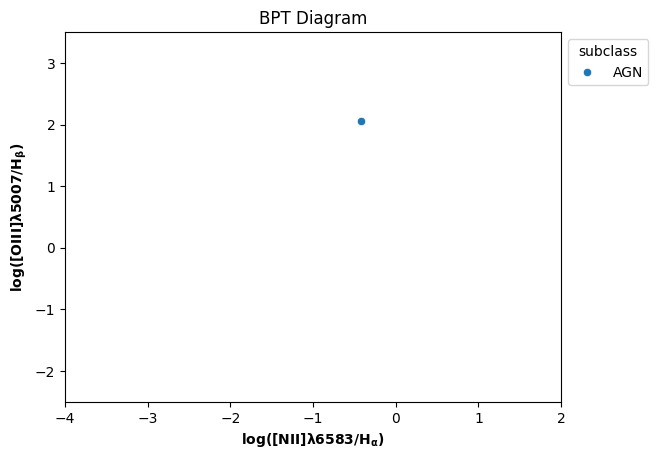

In [13]:
ax = sns.scatterplot(x = 'log(nii/ha)', y='log(oiii/hb)',data=df_wise[df_wise.specobjid == 2383626653969442816], hue='subclass')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title(r'BPT Diagram')
plt.xlabel(r'$\bf log([NII] \lambda 6583 /H_{\alpha})$')
plt.ylabel(r'$\bf log([OIII] \lambda 5007 /H_{\beta})$')

plt.xlim(-4,2)
plt.ylim(-2.5,3.5)

plt.show()

>According to Wright et al. 2010, the location of this object in the WISE color-color plot indicates that it could fall into the type Seyfert, QSOs or Obscured AGNs .